In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [3]:
workforce_ratio = pd.read_csv("Resources/Workforce_ratio_df.csv")
correl_table = pd.read_csv("Resources/correl_table.csv")
correl_table_complete = pd.merge(workforce_ratio, correl_table, how="inner", on=["Country", "Country"])
world_happy_year = pd.read_csv("Resources/happy_by_year.csv")

In [4]:
correl_table_complete

,Unnamed: 0,Country,2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],Workforce Ratio Five Year Average,Workforce Ratio Five Year Median,Workforce Ratio Five Year Max,Workforce Ratio Five Year Min,Workforce Ratio Five Year STD,Happy,Economy,Family,Health,Freedom,Trust,Generous
0,0.0,Afghanistan,24.620070,26.284064,28.063156,28.666658,28.925233,27.311836,28.063156,28.925233,24.620070,1.823801,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730
1,1.0,Albania,72.226226,72.149044,72.171071,72.305482,72.345436,72.239452,72.226226,72.345436,72.149044,0.084583,4.71260,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887
2,2.0,Algeria,22.520465,22.261553,21.916027,21.559497,21.647083,21.980925,21.916027,22.520465,21.559497,0.407161,5.66760,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219
3,5.0,Angola,96.157006,96.179759,96.280556,96.405459,96.480934,96.300743,96.280556,96.480934,96.157006,0.140659,3.87225,0.798380,0.938368,0.133902,0.027432,0.071570,0.105269
4,8.0,Argentina,65.752821,66.817133,67.879334,69.798936,69.738757,67.997396,67.879334,69.798936,65.752821,1.783463,6.45940,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,252.0,Uruguay,74.152614,75.254588,75.431714,75.651143,75.799193,75.257850,75.431714,75.799193,74.152614,0.651828,6.43120,1.135558,1.315312,0.782929,0.574978,0.188516,0.169011
139,253.0,Uzbekistan,67.537971,67.400367,67.291839,67.184301,67.054138,67.293723,67.291839,67.537971,67.054138,0.187355,6.04620,0.723758,1.434100,0.591725,0.655988,0.267424,0.327523
140,256.0,Vietnam,87.987174,88.249817,88.181686,88.221322,88.277505,88.183501,88.221322,88.277505,87.987174,0.115339,5.15460,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664
141,261.0,Zambia,87.439009,87.833617,88.313809,88.846524,88.990346,88.284661,88.313809,88.990346,87.439009,0.658236,4.58440,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430


In [5]:
world_happy_year

,year,Happiness Rank mean,Happiness Rank median,Happiness Rank amin,Happiness Rank amax,Happiness Rank std,Happiness Score mean,Happiness Score median,Happiness Score amin,Happiness Score amax,...,Trust (Government Corruption) mean,Trust (Government Corruption) median,Trust (Government Corruption) amin,Trust (Government Corruption) amax,Trust (Government Corruption) std,Generosity mean,Generosity median,Generosity amin,Generosity amax,Generosity std
0,2015,79.493671,79.5,1,158,45.754363,5.375734,5.2325,2.839,7.587,...,0.143422,0.107220,0,0.551910,0.120034,0.237296,0.216130,0,0.795880,0.126685
1,2016,78.980892,79.0,1,157,45.466030,5.382185,5.3140,2.905,7.526,...,0.137624,0.105470,0,0.505210,0.111038,0.242635,0.222450,0,0.819710,0.133756
2,2017,78.000000,78.0,1,155,44.888751,5.354019,5.2790,2.693,7.537,...,0.123120,0.089848,0,0.464308,0.101661,0.246883,0.231538,0,0.838075,0.134780
3,2018,78.500000,78.5,1,156,45.177428,5.375917,5.3780,2.905,7.632,...,0.112000,0.082000,0,0.457000,0.096492,0.181006,0.174000,0,0.598000,0.098471
4,2019,78.500000,78.5,1,156,45.177428,5.407096,5.3795,2.853,7.769,...,0.110603,0.085500,0,0.453000,0.094538,0.184846,0.177500,0,0.566000,0.095254


In [7]:
def linreg(x_values, y_values, title, coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel('Happy')
    plt.ylabel(title)
    print(f"The r squared value is: {rvalue}")
    plt.show() 

The r squared value is: 0.8289882046904629


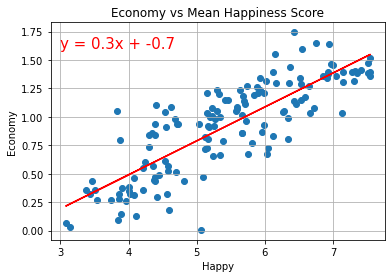

In [23]:
correl_table_complete.plot(kind='scatter', x='Happy', y='Economy')
plt.title("Economy vs Mean Happiness Score")
plt.grid()
x_values = correl_table_complete["Happy"]

y_values = correl_table_complete["Economy"]
linreg(correl_table_complete["Happy"],correl_table_complete["Economy"], "Economy", (3, 1.6))


The r squared value is: 0.7556695571726786


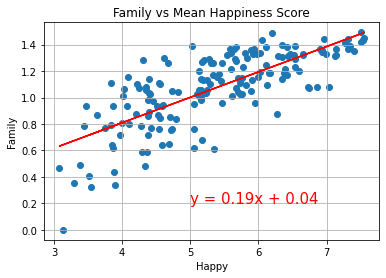

In [7]:
correl_table.plot(kind='scatter', x='Happy', y='Family')
plt.title("Family vs Mean Happiness Score")

plt.grid()
x_values = correl_table["Happy"]

y_values = correl_table["Family"]
linreg(correl_table["Happy"],correl_table["Family"], "Family", (5, 0.2))


The r squared value is: 0.8012330463722878


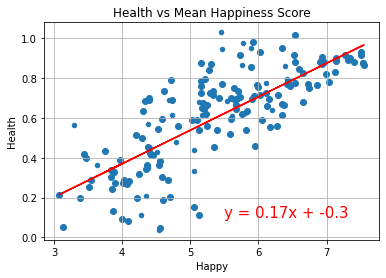

In [24]:
correl_table.plot(kind='scatter', x='Happy', y='Health')
plt.title("Health vs Mean Happiness Score")

plt.grid()
x_values = correl_table_complete["Happy"]

y_values = correl_table_complete["Health"]
linreg(correl_table_complete["Happy"],correl_table_complete["Health"], "Health", (5.5, 0.1))


The r squared value is: 0.5890615071276678


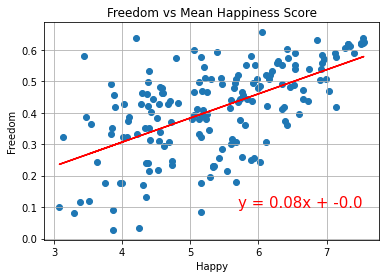

In [9]:
correl_table.plot(kind='scatter', x='Happy', y='Freedom')
plt.title("Freedom vs Mean Happiness Score")

plt.grid()
x_values = correl_table["Happy"]

y_values = correl_table["Freedom"]
linreg(correl_table["Happy"],correl_table["Freedom"], "Freedom", (5.7, 0.1))

The r squared value is: 0.3770023480594032


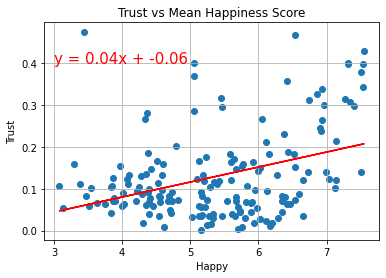

In [25]:
correl_table.plot(kind='scatter', x='Happy', y='Trust')
plt.title("Trust vs Mean Happiness Score")

plt.grid()
x_values = correl_table["Happy"]

y_values = correl_table["Trust"]
linreg(correl_table["Happy"],correl_table["Trust"], "Trust", (3, 0.4))


The r squared value is: 0.14170417506376465


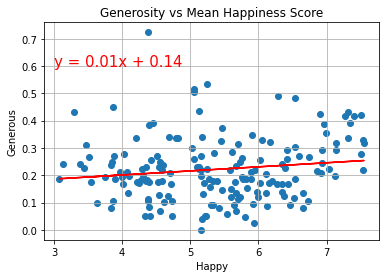

In [26]:
correl_table.plot(kind='scatter', x='Happy', y='Generous')
plt.title("Generosity vs Mean Happiness Score")

plt.grid()
x_values = correl_table["Happy"]

y_values = correl_table["Generous"]
linreg(correl_table["Happy"],correl_table["Generous"], "Generous", (3, 0.6))


The r squared value is: -0.059158114444925934


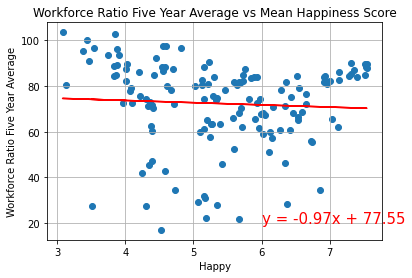

In [8]:
correl_table_complete.plot(kind='scatter', x='Happy', y='Workforce Ratio Five Year Average')
plt.title("Workforce Ratio Five Year Average vs Mean Happiness Score")
plt.grid()
x_values = correl_table_complete["Happy"]

y_values = correl_table_complete["Workforce Ratio Five Year Average"]
linreg(correl_table_complete["Happy"],correl_table_complete["Workforce Ratio Five Year Average"], "Workforce Ratio Five Year Average", (6, 20))


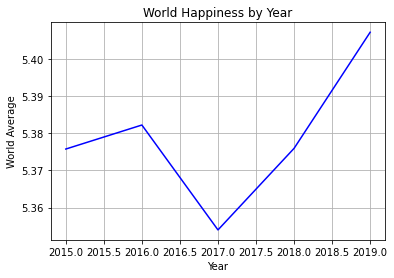

In [38]:

years = [2015, 2016, 2017, 2018, 2019]
mean_happy = world_happy_year["Happiness Score mean"]

world_ave_happy, = plt.plot(years, mean_happy, color="blue", label="Average World Happiness Score")

plt.title("World Happiness by Year")
plt.xlabel("Year")
plt.ylabel("World Average")

plt.grid()
plt.show()

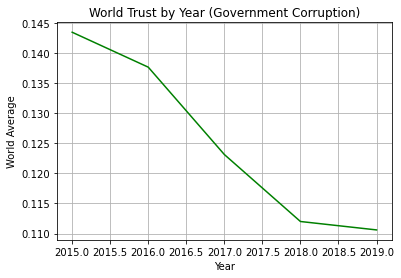

In [56]:

mean_trust = world_happy_year["Trust (Government Corruption) mean"]
world_ave_trust, = plt.plot(years, mean_trust, color="green")
plt.title("World Trust by Year (Government Corruption)")
plt.xlabel("Year")
plt.ylabel("World Average")

plt.grid()
plt.show()


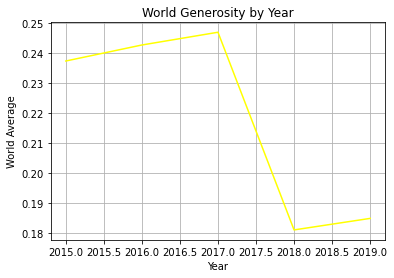

In [44]:

mean_generous = world_happy_year["Generosity mean"]
world_ave_generous, = plt.plot(years, mean_generous, color="yellow")
plt.title("World Generosity by Year")
plt.xlabel("Year")
plt.ylabel("World Average")

plt.grid()
plt.show()


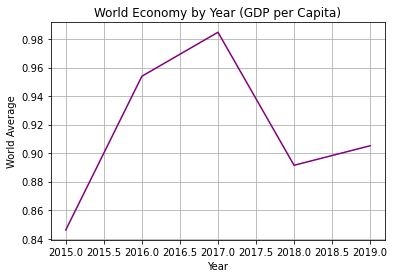

In [46]:
mean_economy = world_happy_year["Economy (GDP per Capita) mean"]
world_ave_economy, = plt.plot(years, mean_economy, color="purple")
plt.title("World Economy by Year (GDP per Capita)")
plt.xlabel("Year")
plt.ylabel("World Average")

plt.grid()
plt.show()

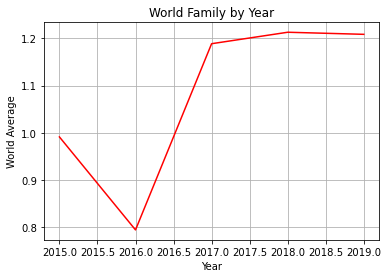

In [50]:
mean_family = world_happy_year["Family mean"]
world_ave_family, = plt.plot(years, mean_family, color="red")
plt.title("World Family by Year")
plt.xlabel("Year")
plt.ylabel("World Average")

plt.grid()
plt.show()

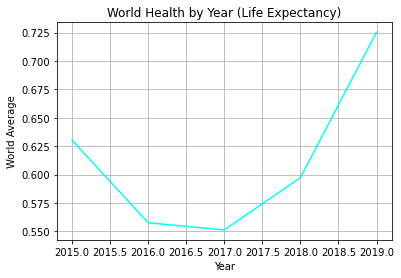

In [51]:
mean_health = world_happy_year["Health (Life Expectancy) mean"]
world_ave_health, = plt.plot(years, mean_health, color="cyan")
plt.title("World Health by Year (Life Expectancy)")
plt.xlabel("Year")
plt.ylabel("World Average")

plt.grid()
plt.show()

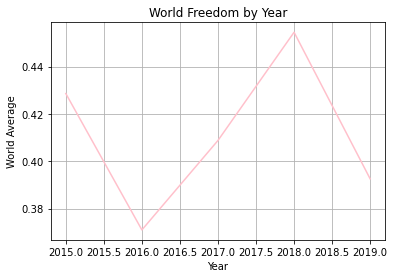

In [52]:
mean_freedom = world_happy_year["Freedom mean"]
world_ave_health, = plt.plot(years, mean_freedom, color="pink")
plt.title("World Freedom by Year")
plt.xlabel("Year")
plt.ylabel("World Average")

plt.grid()
plt.show()

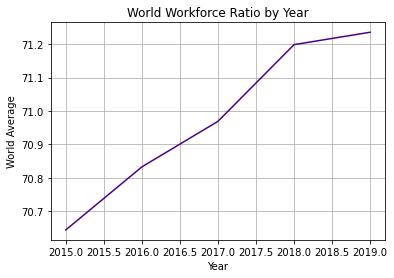

In [55]:
mean_wfratio = [70.64387477, 70.832537, 70.96893882, 71.19846345, 71.23556771]
world_ave_wfratio, = plt.plot(years, mean_wfratio, color="indigo")
plt.title("World Workforce Ratio by Year")
plt.xlabel("Year")
plt.ylabel("World Average")

plt.grid()
plt.show()